In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
file_path = "C:\\Users\\sande\\Documents\\Python\\EDA\\loan_data.csv"
df1 = pd.read_csv(file_path)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Rows and columns of the data set
df1.shape

(614, 13)

In [4]:
type(df1)

pandas.core.frame.DataFrame

In [5]:
columns = df1.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
##seperating categerical and numarical columns
dtype = dict(df1.dtypes)
for i in dtype:
    if dtype[i] == 'object':
        print(i,dtype[i])


Loan_ID object
Gender object
Married object
Dependents object
Education object
Self_Employed object
Property_Area object
Loan_Status object


In [16]:
##another way of writing the above query 
obj_columns = [i for i in dtype if dtype[i] == 'object']
obj_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [18]:
##another way of writing the above query 
df1.select_dtypes(include = 'object').columns
df1.select_dtypes(exclude = 'object').columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [23]:
##take-loc-iloc

df1.take([2,3,4],axis =1)

,Married,Dependents,Education
0,No,0,Graduate
1,Yes,1,Graduate
2,Yes,0,Graduate
3,Yes,0,Not Graduate
4,No,0,Graduate
...,...,...,...
609,No,0,Graduate
610,Yes,3+,Graduate
611,Yes,1,Graduate
612,Yes,2,Graduate


In [30]:
##i-loc
df1.iloc[0:1 ,0:2]

,Loan_ID,Gender
0,LP001002,Male


In [45]:
rows = [100,200,300]
columns = ['Married','Dependents']
df1.loc[rows,columns]

,Married,Dependents
100,Yes,2
200,Yes,1
300,Yes,0


In [50]:
##unique()

df1['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [51]:
##nunique()
df1['Dependents'].nunique()

4

In [55]:
#value_counts
df1['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [56]:
df1['Education'].value_counts(normalize = True)

Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64

In [107]:
##now converting into Data Frame
import pandas as pd
details = dict(df1['Education'].value_counts())
keys = details.keys()
value = details.values()
data = pd.DataFrame(zip(keys,value),columns =['education','Percentage'])
data

,education,Percentage
0,Graduate,480
1,Not Graduate,134


In [105]:
data =dict( df1['Education'].value_counts())
pd.DataFrame(data,index = ['Percentage'])

,Graduate,Not Graduate
Percentage,480,134


In [109]:
##**Bar Chart**
data

,education,Percentage
0,Graduate,480
1,Not Graduate,134


TypeError: 'str' object is not callable

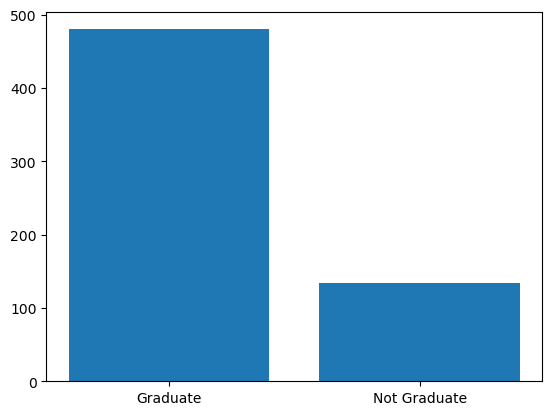

In [171]:
import matplotlib.pyplot as plt

# Assuming 'education' and 'Percentage' are valid column names in your DataFrame data
plt.bar(data['education'], data['Percentage'])  # Pass column names without quotation marks
plt.xlabel("Education")
plt.ylabel('Percentage')
plt.show()


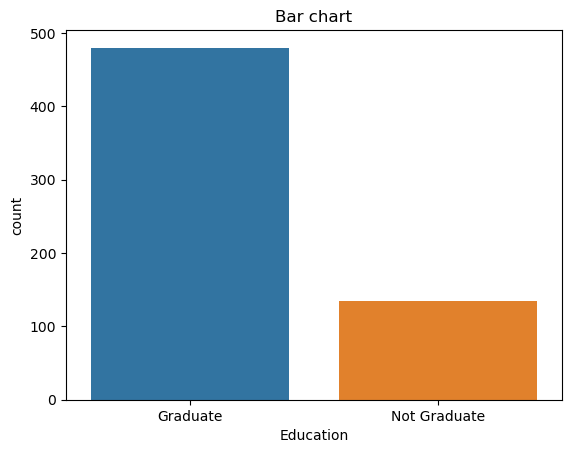

In [154]:
import seaborn as sns
order_lables=['Graduate','Not Graduate']

sns.countplot(data=df1,
x ='Education')
plt.title("Bar chart")
plt.show()

In [147]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

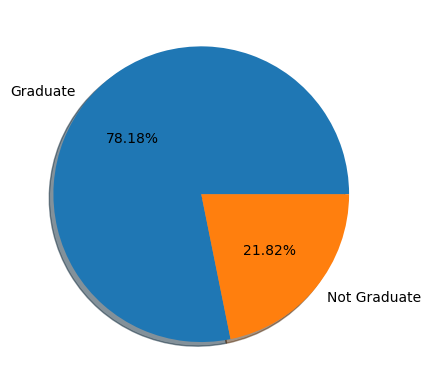

In [170]:
keys = df1['Education'].value_counts().keys()
values = df1['Education'].value_counts().to_list()
plt.pie(x = values,labels = keys, shadow=True,labeldistance =1.1,radius =1,autopct = '%0.2f%%')
plt.show()

In [ ]:
#count- max - min - mean - median- 25p - 50p - 75p

In [190]:
count = df1['LoanAmount'].count()
maxx = df1['LoanAmount'].max()
minn = df1['LoanAmount'].min()
meann = df1['LoanAmount'].mean()
median = df1['LoanAmount'].median()

list1 = [count,maxx,minn,meann, median]
loan_index = ['count','maxx','minn','meann', 'median']
pd.DataFrame(list1,columns =['Loan'],index =loan_index )

,Loan
count,592.000000
maxx,700.000000
minn,9.000000
meann,146.412162
median,128.000000


In [202]:
cols = df1.select_dtypes(exclude = 'object').columns
d1 = {}
for i in cols:
    count = df1[i].count()
    maxx = df1[i].max()
    minn = df1[i].min()
    meann = df1[i].mean()
    median = df1[i].median()
    list1 = [count,maxx,minn,meann,median]
    d1[i]=list1
index_list = ['count','maxx','minn','meann','median']
pd.DataFrame(d1,index =index_list )

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.0,564.000000
maxx,81000.000000,41667.000000,700.000000,480.0,1.000000
minn,150.000000,0.000000,9.000000,12.0,0.000000
meann,5403.459283,1621.245798,146.412162,342.0,0.842199
median,3812.500000,1188.500000,128.000000,360.0,1.000000


In [205]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [211]:
##percentile and quantile
import numpy as np
loan_df = df1['LoanAmount']
np.percentile(df1['ApplicantIncome'],25)

2877.5

In [212]:
np.quantile(df1['ApplicantIncome'],0.25)

2877.5

<BarContainer object of 3 artists>

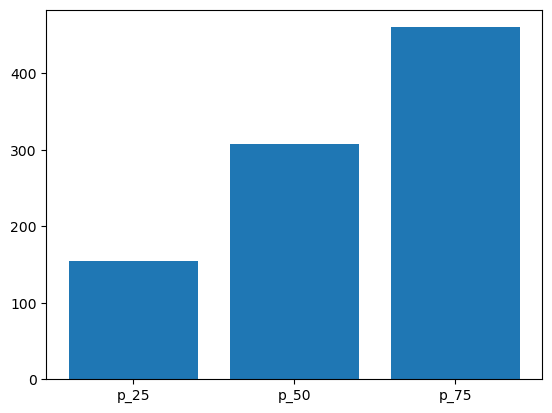

In [230]:
income_df = df1['ApplicantIncome']
p_25 = len(income_df[income_df < np.percentile(income_df,25)])
p_50 = len(income_df[income_df < np.percentile(income_df,50)])
p_75 = len(income_df[income_df < np.percentile(income_df,75)])
l1 = ['p_25','p_50','p_75']
l2 = [p_25,p_50,p_75]
pd.DataFrame(l2,index = l1)
#another way of writing
d1 = pd.DataFrame(zip(l1,l2),columns =['percent','count'])
plt.bar(d1['percent'],d1['count'])

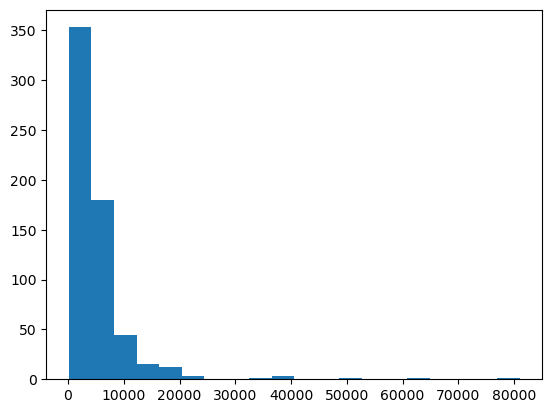

In [12]:
##Histogramm
import matplotlib.pyplot as plt
income_df = df1['ApplicantIncome']
freq,interval,n = plt.hist(income_df,bins = 20)

In [11]:
con1 = income_df > 150 
con2 = income_df < 4192.5
len(income_df[con1&con2])

352

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


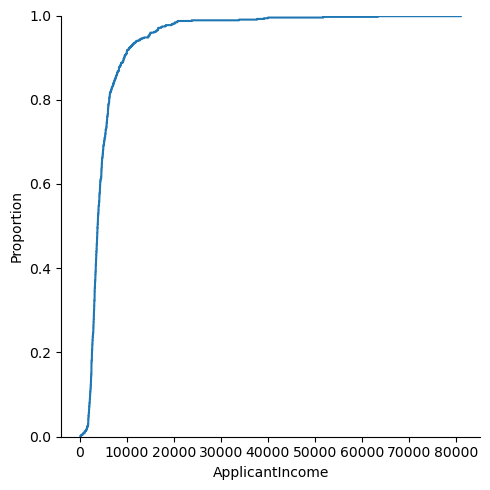

In [19]:
import seaborn as sns
sns.displot(income_df,kind='ecdf')

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sande\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


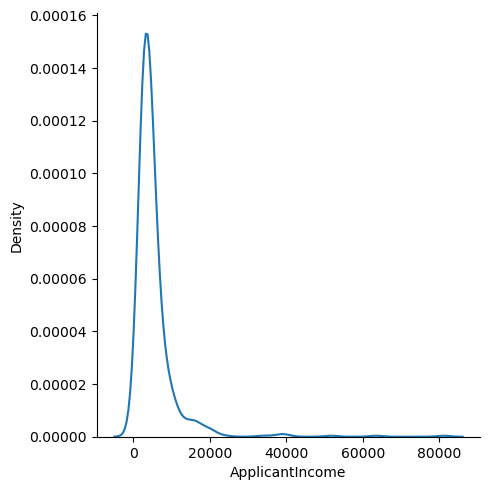

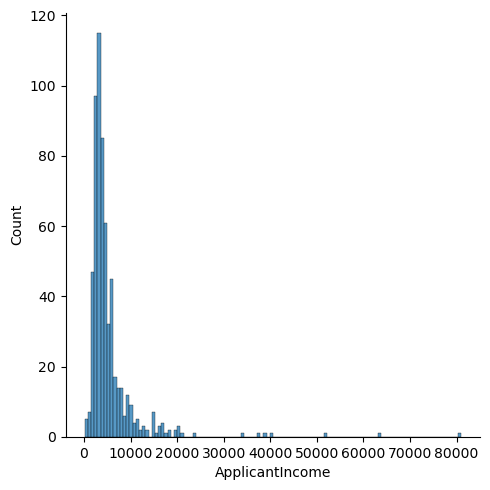

In [21]:
##kernal density estimation
sns.displot(income_df,kind = 'kde')

sns.displot(income_df)

<Axes: >

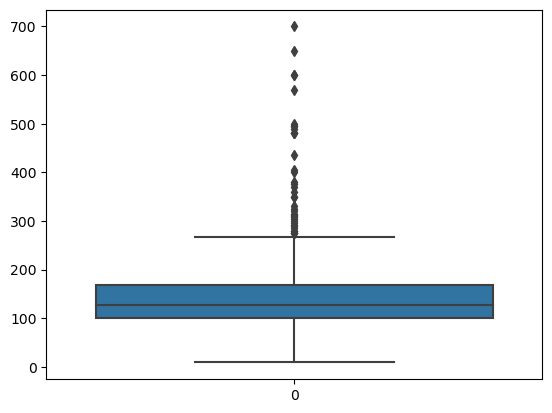

In [35]:
##out Layer Analysis
sns.boxplot(df1['LoanAmount'])

In [69]:
q1 = np.quantile(df1['ApplicantIncome'],0.25)
q2 = np.quantile(df1['ApplicantIncome'],0.50)
q3 = np.quantile(df1['ApplicantIncome'],0.75)
iqr = q3 -q1
ub = q3+1.5*iqr
lb =q1-1.5*iqr
##outlayers
con1 = df1['ApplicantIncome'] >ub
con2 = df1['ApplicantIncome']<lb
len(df1[con1|con2])

#Non outlayers
con1 = df1['ApplicantIncome'] <ub
con2 = df1['ApplicantIncome']>lb
nonoutlayer_df = len(df1[con1|con2])

In [65]:
##genralize method for finding outlayer in all numarical columns


def outlayers(col):
    q1 = np.quantile(df1[col],0.25)
    q2 = np.quantile(df1[col],0.50)
    q3 = np.quantile(df1[col],0.75)
    iqr = q3 -q1
    ub = q3+1.5*iqr
    lb =q1-1.5*iqr
    ##outlayers
    con1 = df1[col] >ub
    con2 = df1[col]<lb
    outlayer_df = len(df1[con1|con2])
    print(f"{col}outlayer is {outlayer_df}")
num_col = df1.select_dtypes(exclude = 'object').columns
for col in num_col:
    outlayers(col)
    


ApplicantIncomeoutlayer is 50
CoapplicantIncomeoutlayer is 18
LoanAmountoutlayer is 0
Loan_Amount_Termoutlayer is 0
Credit_Historyoutlayer is 0


TypeError: 'int' object is not subscriptable

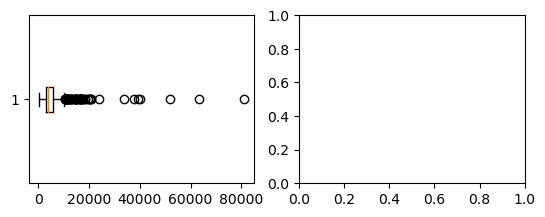

In [72]:
plt.subplot(2,2,1)
plt.boxplot(df1['ApplicantIncome'],vert =False)
plt.subplot(2,2,2)
plt.boxplot(nonoutlayer_df['ApplicantIncome'],vert=False)

In [117]:
##bi variant Analysis
df1.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [82]:
con1 = df1['Gender'] == "Male"
con2 = df1['Loan_Status'] == 'Y'
con = con1 & con2
len(df1[con])

339

In [94]:
labels = df1['Gender'].value_counts().keys()
for i in labels:
    con1 = df1['Gender'] == i
    con2 = df1['Loan_Status'] == 'Y'
    con3 = df1['Loan_Status'] == 'N'
    approved = con1 & con2
    rejected = con1 & con3
    print(f"{len(df1[approved])}loans approved for {i}")
    print(f"{len(df1[rejected])}loans disapproved for {i}")


339loans approved for Male
150loans disapproved for Male
75loans approved for Female
37loans disapproved for Female


In [102]:
labels = df1['Gender'].value_counts().keys()
appr = []
reje = []
for i in labels:
    con1 = df1['Gender'] == i
    con2 = df1['Loan_Status'] == 'Y'
    con3 = df1['Loan_Status'] == 'N'
    approved = con1 & con2
    rejected = con1 & con3
    appr.append(len(df1[approved]))
    reje.append(len(df1[rejected]))
d1 = pd.DataFrame(zip(appr,reje,labels),columns = ['approved','rejected','labels'])
d1.set_index(labels)

,approved,rejected,labels
Gender,,,
Male,339,150,Male
Female,75,37,Female


<Axes: xlabel='Loan_Status'>

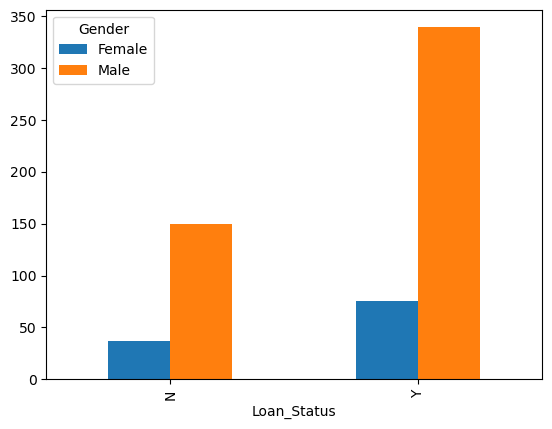

In [116]:
###creating Data Frame using shortcut

col1 = df1['Gender']
col2 = df1['Loan_Status']
result = pd.crosstab(col2,col1)
result.plot(kind = 'bar')

In [122]:

col1 = df1['Gender']
col2 = [df1['Loan_Status'],
df1['Education']]
result2=pd.crosstab(col1 ,col2)
result2

Loan_Status        N                     Y             
Education   Graduate Not Graduate Graduate Not Graduate
Gender                                                 
Female            31            6       61           14
Male             105           45      271           68

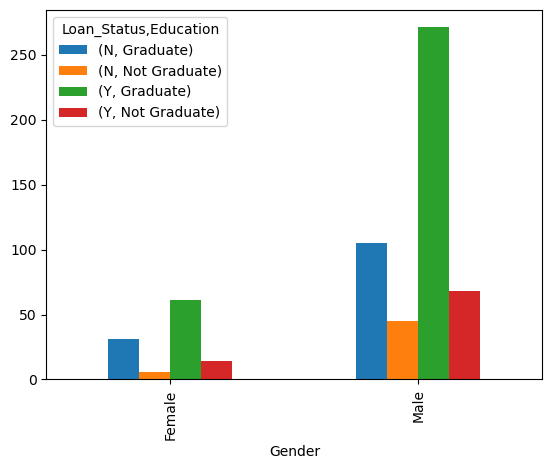

In [134]:
result2.plot(kind = 'bar')
plt.show()

In [136]:
df1.select_dtypes(exclude = 'object').columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

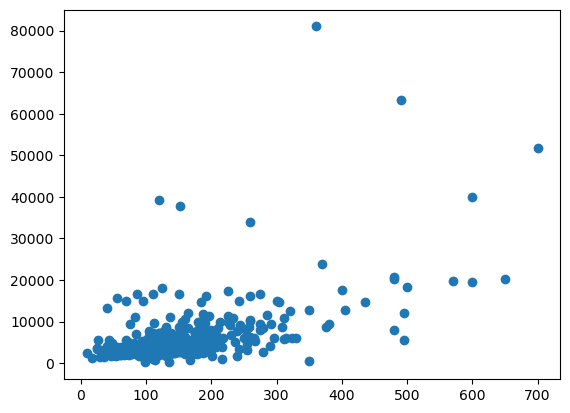

In [137]:
l1 = df1['LoanAmount']
l2 = df1['ApplicantIncome']
plt.scatter(l1,l2)

In [ ]:
# Correlation-Coefiecient
# Denoted with r
# Pearson correlation coefficient
# r varies from -1 to 1
# r= -1 to 0 : Negatively correlated
# r= 0 to 1: Postively Correlated
# r=0 : No relation

In [139]:
df1.corr(numeric_only = True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


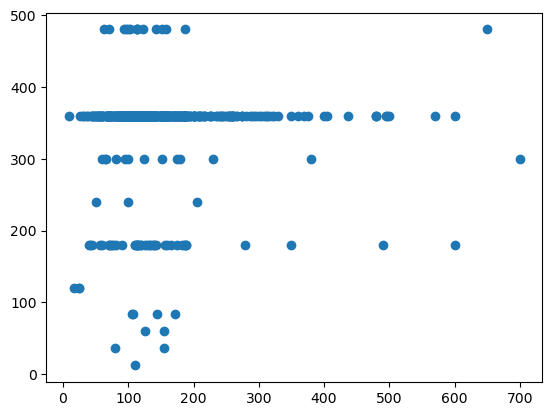

In [141]:
l1 = df1['LoanAmount']
l2 = df1['Loan_Amount_Term']
plt.scatter(l1,l2)

<Axes: >

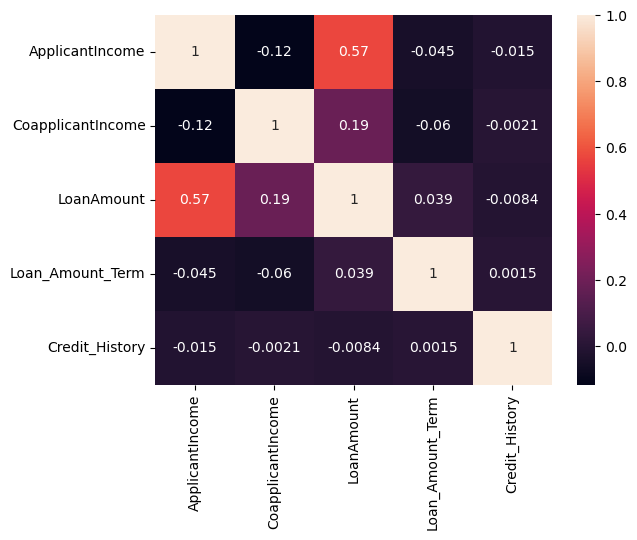

In [144]:
corr =df1.corr(numeric_only = True)
sns.heatmap(corr, annot=True)

In [19]:
##Categorical to Numerical Conversion
df1['Gender'].unique()
d1 = {'Y': 0,'N': 1}
df1['Loan_Status'] = df1['Loan_Status'].map(d1)

In [21]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,NaN,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,NaN,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,NaN,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,NaN,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,NaN,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,NaN,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,0
610,LP002979,NaN,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,0
611,LP002983,NaN,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,0
612,LP002984,NaN,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,0


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
file_path = "C:\\Users\\sande\\Documents\\Python\\EDA\\loan_data.csv"
df1 = pd.read_csv(file_path)
df1.head()
d1 = {}
labels = df1['Gender'].unique()
for i in range (len(labels)):
    d1[labels[i]]=i
    
df1['Gender']=df1['Gender'].map(d1)
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [40]:
#np.where condition
import pandas as pd
import numpy as np
import seaborn as sns
file_path = "C:\\Users\\sande\\Documents\\Python\\EDA\\loan_data.csv"
df1 = pd.read_csv(file_path)
df1.head()

cond = df1['Gender'] == "Male"
df1['Gender'] = np.where(cond,1,0)
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [47]:
#One hot encoder
import pandas as pd
import numpy as np
import seaborn as sns
file_path = "C:\\Users\\sande\\Documents\\Python\\EDA\\loan_data.csv"
df1 = pd.read_csv(file_path)
df1.head()
df1= df1.drop('Loan_ID',axis = 1)
pd.get_dummies(df1,dtype = int)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


In [64]:
##Label encoder
import pandas as pd
import numpy as np
import seaborn as sns
file_path = "C:\\Users\\sande\\Documents\\Python\\EDA\\loan_data.csv"
df1 = pd.read_csv(file_path)
df1.head()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
import pandas as pd
import numpy as np
file_path = "C:\\Users\\sande\\Documents\\Python\\EDA\\loan_data.csv"
df1 = pd.read_csv(file_path)
df1.head()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = df1.select_dtypes(include = 'object').columns
for i in cat_col:
  df1[i] = le.fit_transform(df1[i])
    
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [8]:
###Z-Score or standardization 

##Z = X-U/SIGMA
import pandas as pd
import numpy as np
file_path = "C:\\Users\\sande\\Documents\\Python\\EDA\\loan_data.csv"
df1 = pd.read_csv(file_path)
df1.head()
df1['ApplicantIncome']
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1['ApplicantIncome_z']= ss.fit_transform(df1[['ApplicantIncome']])
df1[['ApplicantIncome_z','ApplicantIncome']]

,ApplicantIncome_z,ApplicantIncome
0,0.072991,5849
1,-0.134412,4583
2,-0.393747,3000
3,-0.462062,2583
4,0.097728,6000
...,...,...
609,-0.410130,2900
610,-0.212557,4106
611,0.437174,8072
612,0.357064,7583


{'whiskers': [<matplotlib.lines.Line2D at 0x1554c892510>,
 'caps': [<matplotlib.lines.Line2D at 0x1554c893950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1554c891890>],
 'medians': [<matplotlib.lines.Line2D at 0x1554c89ce50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1554d082810>],
 'means': []}

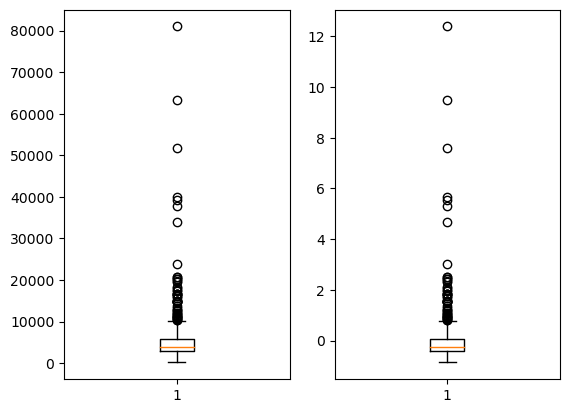

In [13]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.boxplot(df1['ApplicantIncome'])
plt.subplot(1,2,2)
plt.boxplot(df1['ApplicantIncome_z'])

In [ ]:
##Normalization
##minmax scalar

import pandas as pd
import numpy as np
file_path = "C:\\Users\\sande\\Documents\\Python\\EDA\\loan_data.csv"
df1 = pd.read_csv(file_path)
df1.head()
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
df1['ApplicantIncome_m']= MM.f
